<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🎶 Predicting the Beats-per-Minute of Songs ⏱️
    </h1>
</div>


# Overview

* **Background** <br>
  Music is a universal language, and the pace of a song (measured in Beats-per-Minute, BPM) strongly affects how listeners perceive its mood and energy. Predicting BPM from audio-related features can support applications in recommendation systems, playlist curation, and music analytics.

* **Goal of the Project** <br>
  Using the dataset, we aim to **predict the BPM of songs** based on a variety of extracted audio features. The results can help enhance automatic music tagging and personalization in streaming platforms.

**Key Features**

**Target Variable** <br>

* `BeatsPerMinute`: *The tempo of the track measured in beats per minute (numeric value).*

**General Feature Characteristics** <br>

* `RhythmScore`: Numeric representation of rhythmic complexity or clarity.
* `AudioLoudness`: Loudness in decibels, reflecting overall sound intensity.
* `VocalContent`: Degree of vocal presence in the track.
* `AcousticQuality`: How acoustic or natural the recording sounds.
* `InstrumentalScore`: Measure of instrumental emphasis versus vocal parts.
* `LivePerformanceLikelihood`: Probability that the track resembles a live performance.
* `MoodScore`: Encodes the emotional tone of the track.
* `TrackDurationMs`: Track duration in milliseconds.
* `Energy`: Indicator of how energetic or intense the track feels.

**Files Provided**

* `train.csv`: Training dataset including features and BPM target.
* `test.csv`: Test dataset without target labels.
* `sample_submission.csv`: Submission format for predictions.

Source: [Playground Series S5E9 - Predicting the Beats-per-Minute of Songs](https://www.kaggle.com/competitions/playground-series-s5e9)

Source: [BPM Prediction Challenge](https://www.kaggle.com/datasets/gauravduttakiit/bpm-prediction-challenge)

**Project Objective**

The primary objective of this notebook is to **perform EDA and build regression models to predict song BPM**.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):** Analyze feature distributions, correlations, and detect outliers.
* **Feature Engineering:** Scale numerical variables, create new derived features if beneficial.
* **Modeling:** Train and compare regression models (tree-based, linear, ensemble).
* **Hyperparameter Tuning:** Optimize models for better generalization.
* **Evaluation Framework:** <br>

  * Cross-validation.
  * Metrics: RMSE.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew
from scipy.signal import find_peaks

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [2]:
# Load the datasets
df_train = pd.read_csv("train.csv")
df_origin = pd.read_csv("Train_origin.csv")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nOrigin Data Shape:", df_origin.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (524164, 11)

Origin Data Shape: (14633, 10)

Test Data Shape: (174722, 10)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [3]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.tail())

print("\nOrigin Data Preview:")
display(df_origin.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
524159,524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235
524163,524163,0.776515,-5.484091,0.023500,0.271189,0.067338,0.339319,0.793487,313870.0566,0.223933,77.45960



Origin Data Preview:


,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.513080,-7.811659,0.071013,0.064564,0.109495,0.316042,0.736929,328639.3188,0.556200,117.092439
1,0.775393,-6.819409,0.023500,0.510599,0.187498,0.024361,0.259488,271967.9826,0.410533,122.002279
2,0.636408,-19.782248,0.063451,0.427861,0.002226,0.024300,0.054848,186147.0029,0.533333,149.130616
3,0.232190,-14.957299,0.023500,0.076268,0.000001,0.228454,0.744650,321734.9723,0.658533,95.832178
4,0.758564,-4.715966,0.023500,0.263551,0.414794,0.197167,0.966592,179973.3982,0.230467,125.696263



Test Data Preview:


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [4]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nOrigin Data Info:")
df_origin.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB

Origin Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entr

## Insights from Initial Data Exploration

**Dataset Size and Structure**
   - The **training dataset** contains 524164 samples with 11 columns, including the target variable `BeatsPerMinute`.
   - The **original dataset** has 14633 samples and 10 columns, similar in structure but smaller in size. 
   - The **test dataset** includes 174722 samples with 10 columns (without the target), ready for prediction.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `RhythmScore`, `AudioLoudness`, `VocalContent`, `AcousticQuality`, `InstrumentalScore`, `LivePerformanceLikelihood`, `MoodScore`, `TrackDurationMs`, `Energy`.
     - **Categorical features:** None.
   - The target variable is **float64** value.

**Data Completeness**  
   - The dataset have **no missing values** on train, test and origin datasets.
   - Data types are appropriate: numerical features are float64 and int64. But we need convert to save memory usage.
   - The columns `id` are not meaningful for analysis. So these columns are not really a part of the information we should care about. We can drop them.

In [5]:
# Remove space in name columns
df_train.columns = (
    df_train.columns
    .str.strip()
    .str.replace(" ", "")
)

df_origin.columns = (
    df_origin.columns
    .str.strip()
    .str.replace(" ", "")
)

df_test.columns = (
    df_test.columns
    .str.strip()
    .str.replace(" ", "")
)

# Drop columns id
df_train.set_index(df_train.id, inplace=True)
df_train.drop(columns="id", axis=1, inplace=True)
df_test.set_index(df_test.id, inplace=True)
df_test.drop(columns="id", axis=1, inplace=True)

# We need to update the data for the columns, this helps to reduce memory.
df_train = df_train.astype({
    "RhythmScore": "float32",
    "AudioLoudness": "float32",
    "VocalContent": "float32",
    "AcousticQuality": "float32",
    "InstrumentalScore": "float32",
    "LivePerformanceLikelihood": "float32",
    "MoodScore": "float32",
    "TrackDurationMs": "float64",
    "Energy": "float32",
    "BeatsPerMinute": "float32"
})

df_origin = df_origin.astype({
    "RhythmScore": "float32",
    "AudioLoudness": "float32",
    "VocalContent": "float32",
    "AcousticQuality": "float32",
    "InstrumentalScore": "float32",
    "LivePerformanceLikelihood": "float32",
    "MoodScore": "float32",
    "TrackDurationMs": "float64",
    "Energy": "float32",
    "BeatsPerMinute": "float32"
})

df_test = df_test.astype({
    "RhythmScore": "float32",
    "AudioLoudness": "float32",
    "VocalContent": "float32",
    "AcousticQuality": "float32",
    "InstrumentalScore": "float32",
    "LivePerformanceLikelihood": "float32",
    "MoodScore": "float32",
    "TrackDurationMs": "float64",
    "Energy": "float32"
})

In [6]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nOrigin Data Info:")
df_origin.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float32
 1   AudioLoudness              524164 non-null  float32
 2   VocalContent               524164 non-null  float32
 3   AcousticQuality            524164 non-null  float32
 4   InstrumentalScore          524164 non-null  float32
 5   LivePerformanceLikelihood  524164 non-null  float32
 6   MoodScore                  524164 non-null  float32
 7   TrackDurationMs            524164 non-null  float64
 8   Energy                     524164 non-null  float32
 9   BeatsPerMinute             524164 non-null  float32
dtypes: float32(9), float64(1)
memory usage: 26.0 MB

Origin Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 10 columns):
 #   Column 

In [7]:
cm = sns.light_palette("blue", as_cmap=True)
print("Train data describe:")
display(df_train.drop(columns=["BeatsPerMinute"], axis=1).describe().T.style.background_gradient(cmap=cm))
print("\nOrigin data describe:")
display(df_origin.drop(columns=["BeatsPerMinute"], axis=1).describe().T.style.background_gradient(cmap=cm))
print("\nTest data describe:")
display(df_test.describe().T.style.background_gradient(cmap=cm))

Train data describe:


,count,mean,std,min,25%,50%,75%,max
RhythmScore,524164.000000,0.632843,0.156899,0.076900,0.515850,0.634686,0.739179,0.975000
AudioLoudness,524164.000000,-8.379016,4.616221,-27.509726,-11.551933,-8.252499,-4.912298,-1.357000
VocalContent,524164.000000,0.074443,0.049939,0.023500,0.023500,0.066425,0.107343,0.256401
AcousticQuality,524164.000000,0.262913,0.223120,0.000005,0.069413,0.242502,0.396957,0.995000
InstrumentalScore,524164.000000,0.117690,0.131845,0.000001,0.000001,0.074247,0.204065,0.869258
LivePerformanceLikelihood,524164.000000,0.178398,0.118186,0.024300,0.077637,0.166327,0.268946,0.599924
MoodScore,524164.000000,0.555843,0.225480,0.025600,0.403921,0.564817,0.716633,0.978000
TrackDurationMs,524164.000000,241903.692949,59326.601501,63973.000000,207099.876625,243684.058150,281851.658500,464723.228100
Energy,524164.000000,0.500923,0.289952,0.000067,0.254933,0.511800,0.746000,1.000000



Origin data describe:


,count,mean,std,min,25%,50%,75%,max
RhythmScore,14633.000000,0.597370,0.176921,0.076900,0.474349,0.600233,0.720912,0.975000
AudioLoudness,14633.000000,-8.441599,4.727868,-27.509726,-11.659427,-8.236074,-4.829767,-1.357000
VocalContent,14633.000000,0.083957,0.058226,0.023500,0.023500,0.072629,0.122715,0.346387
AcousticQuality,14633.000000,0.280623,0.238181,0.000005,0.061750,0.252848,0.441652,0.995000
InstrumentalScore,14633.000000,0.136972,0.158300,0.000001,0.000001,0.082805,0.236554,0.890385
LivePerformanceLikelihood,14633.000000,0.193121,0.135068,0.024300,0.075404,0.180057,0.287646,0.803157
MoodScore,14633.000000,0.523717,0.241670,0.025600,0.351998,0.525871,0.699439,0.978000
TrackDurationMs,14633.000000,241743.824913,67216.815488,63973.000000,196588.623600,241235.859000,286987.805700,519650.691100
Energy,14633.000000,0.500550,0.288769,0.000067,0.250600,0.500800,0.750600,1.000000



Test data describe:


,count,mean,std,min,25%,50%,75%,max
RhythmScore,174722.000000,0.632591,0.157229,0.140859,0.514918,0.634556,0.739179,0.975000
AudioLoudness,174722.000000,-8.377496,4.622287,-27.442730,-11.550095,-8.253186,-4.903740,-1.357000
VocalContent,174722.000000,0.074475,0.050024,0.023500,0.023500,0.066432,0.107302,0.258857
AcousticQuality,174722.000000,0.262903,0.222899,0.000005,0.069448,0.242412,0.396870,0.995000
InstrumentalScore,174722.000000,0.117407,0.131628,0.000001,0.000001,0.073968,0.202977,0.680914
LivePerformanceLikelihood,174722.000000,0.178317,0.118165,0.024300,0.077821,0.165956,0.268133,0.599544
MoodScore,174722.000000,0.555861,0.226218,0.025600,0.403788,0.566015,0.716694,0.978000
TrackDurationMs,174722.000000,241753.736419,59103.896616,63973.000000,207518.151300,243584.585400,281737.445300,449288.808400
Energy,174722.000000,0.500545,0.290550,0.000067,0.253817,0.511867,0.746133,0.999867


## Descriptive Insights from Dataset Statistics

**Feature Highlights**

* **RhythmScore**: Mean around 0.59–0.63, ranging from \~0.07 to \~0.97 → reflects wide diversity in rhythmic complexity across tracks.
* **AudioLoudness**: Average \~-8.4 dB, with min \~-27.5 dB and max \~-1.35 dB → wide spread from very quiet to relatively loud tracks, showing clear differences in sound intensity.
* **VocalContent**: Narrow range (0.02 – 0.34), mean \~0.07–0.08 → most tracks have low-to-moderate vocal presence, suggesting many are instrumentally oriented.
* **AcousticQuality**: Mean \~0.26–0.28, ranging from near 0 to \~0.99 → dataset includes both electronic-heavy tracks (low values) and highly acoustic tracks (high values).
* **InstrumentalScore**: Mean \~0.11–0.13, mostly below 0.9 → majority of tracks feature low-to-moderate instrumental emphasis.
* **LivePerformanceLikelihood**: Mean \~0.18–0.19, narrow range from 0.02 to \~0.83 → only a small fraction of tracks resemble live performances.
* **MoodScore**: Mean \~0.52–0.55, wide range (0.02 – 0.97) → spans full emotional spectrum, from calm and melancholic to energetic and cheerful.
* **TrackDurationMs**: Average duration \~241k ms (\~4 minutes), min \~63k ms (\~1 minute), max \~519k ms (\~8.6 minutes) → aligns well with typical song lengths.
* **Energy**: Mean \~0.50, evenly distributed between 0.0 – 1.0 → balance between calm tracks and highly energetic ones.
* **BeatsPerMinute (Target)**: Wide variation, from <60 BPM (slow ballads) to >200 BPM (electronic, dance, hardcore) → captures tempo diversity across the dataset.

**Overall Observations**

* The three datasets (**train, test, origin**) show **consistent distributions** in terms of mean, median, min, max, and percentiles → ensures no significant distributional shift.
* Certain features such as `AudioLoudness`, `TrackDurationMs`, and `BeatsPerMinute` show **high dispersion (high std)**.
* Normalized features like `RhythmScore`, `VocalContent`, `MoodScore`, `Energy` are all within \[0, 1] → model-ready with minimal scaling required.
* The target variable `BeatsPerMinute` spans a broad range and shows strong dispersion.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [8]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value Origin dataset: ")
displayNULL(df_origin, dataset_name="Origin Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 524,164 rows.

Missing value Origin dataset: 
🔎 Missing Value Summary for: Origin Set
✅ No missing values detected in 14,633 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 174,722 rows.


## Checking duplicate Value

In [9]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Origin Data":  df_origin,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 524,164 rows

🔍 Origin Data Duplicate Analysis
✅ No duplicates found in 14,633 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 174,722 rows



## Checking Outlier Value

In [10]:
num_features = ["RhythmScore", "AudioLoudness", "VocalContent", "AcousticQuality", "InstrumentalScore", "LivePerformanceLikelihood",
                "MoodScore", "TrackDurationMs", "Energy"]

def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


,Feature,Outlier Count
0,RhythmScore,8
1,AudioLoudness,1770
2,VocalContent,1245
3,AcousticQuality,6746
4,InstrumentalScore,2845
5,LivePerformanceLikelihood,129
6,TrackDurationMs,4267


In [11]:
checking_outlier(list_feature=num_features, df=df_origin, dataset_name="Origin data")

🔍 Origin data Checking outlier


,Feature,Outlier Count
0,RhythmScore,51
1,AudioLoudness,57
2,VocalContent,42
3,InstrumentalScore,171
4,LivePerformanceLikelihood,39
5,TrackDurationMs,59


In [12]:

checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


,Feature,Outlier Count
0,RhythmScore,1
1,AudioLoudness,614
2,VocalContent,440
3,AcousticQuality,2266
4,InstrumentalScore,998
5,LivePerformanceLikelihood,43
6,TrackDurationMs,1397


#### Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values across the **train**, **test**, and **original** datasets.
* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

* **No duplicate values** were detected.
 
**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train**, **origin** and **test** datasets contain **notable outliers** in `RhythmScore`, `AudioLoudness`, `VocalContent`, `AcousticQuality`, `InstrumentalScore`, `LivePerformanceLikelihood`, `TrackDurationMs`

**Conclusion**

* The **synthetic training** and **test datasets** exhibit excellent data quality with **no missing**.
* The duplicate record no exist across the **train**, **test**, and **original** datasets.
* The outlier value exist across the **train**, **test**, and **original** datasets.
* Overall, data readiness is high and preprocessing complexity is minimal.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


In [13]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

## Beats Per Minute Distribution

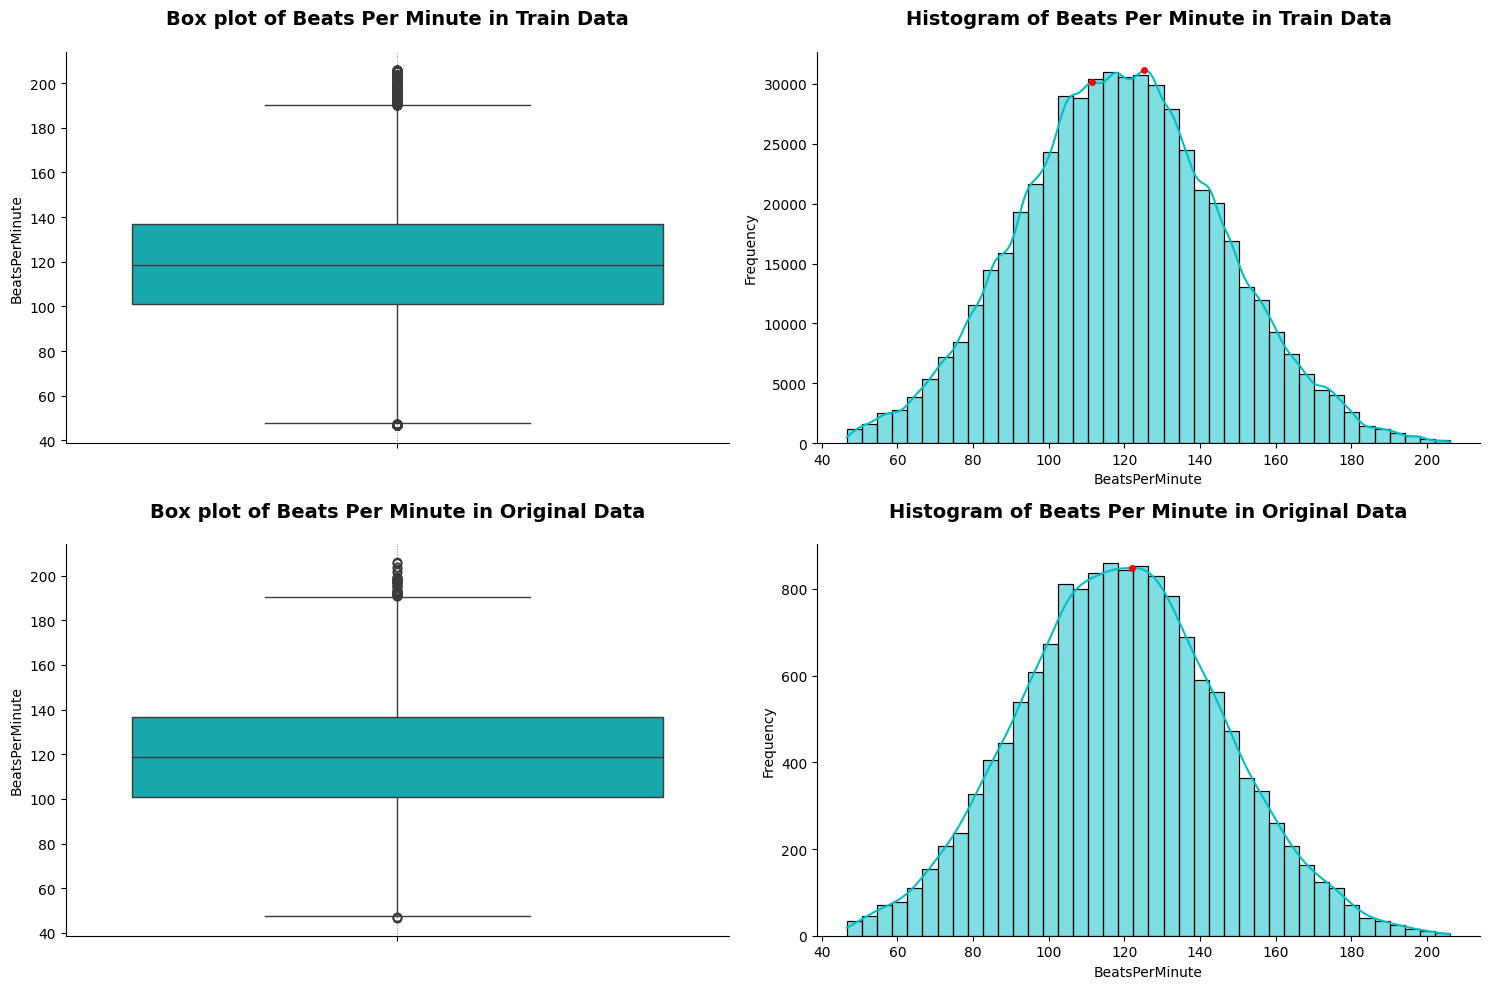

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(15, 10))
datasets = [("Train Data", df_train), ("Original Data", df_origin)]

for i, (title, df_) in enumerate(datasets):
    ax_box  = axes[i, 0]
    ax_hist = axes[i, 1]

    # If the target column is missing, skip and display a message on the plot
    if 'BeatsPerMinute' not in df_.columns:
        ax_box.axis('off'); ax_hist.axis('off')
        ax_box.text(0.5, 0.5, f"{title}: missing 'BeatsPerMinute'", ha='center', va='center')
        continue

    # Boxplot
    sns.boxplot(y=df_["BeatsPerMinute"], ax=ax_box, color="#00BFC4")
    ax_box.set_title(f"Box plot of Beats Per Minute in {title}", fontsize=14, pad=20, weight="bold")
    ax_box.grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
    sns.despine(ax=ax_box, top=True, right=True, left=False, bottom=False)

    # Histogram + KDE (draw KDE once with histplot)
    sns.histplot(df_["BeatsPerMinute"], ax=ax_hist, bins=40, kde=True, color="#00BFC4")
    ax_hist.set_title(f"Histogram of Beats Per Minute in {title}", fontsize=14, pad=20, weight="bold")
    ax_hist.set_xlabel("BeatsPerMinute"); ax_hist.set_ylabel("Frequency")
    sns.despine(ax=ax_hist, top=True, right=True, left=False, bottom=False)

    # Get the KDE curve drawn by histplot (last line on the axis)
    kde_line = ax_hist.lines[-1]
    kde_x, kde_y = kde_line.get_data()

    # Find peaks on KDE (tune prominence/distance for smoother detection)
    peaks_idx, _ = find_peaks(kde_y, prominence=0.001, distance=10)
    ax_hist.plot(kde_x[peaks_idx], kde_y[peaks_idx], "ro", ms=4)

plt.tight_layout()
plt.show()

### Distribution Analysis of Customer Churn

* **Approximately normal distribution**, centered around **120 BPM** → common tempo in popular music.
* **IQR \~100–135 BPM**, where most songs fall.
* Presence of some **outliers**: <60 BPM (ballads/slow) and >180 BPM (dance/fast tempo).
* **Train data** and **original data** show very similar distributions → train set is representative of the original dataset.

## Numerical Feature Distributions

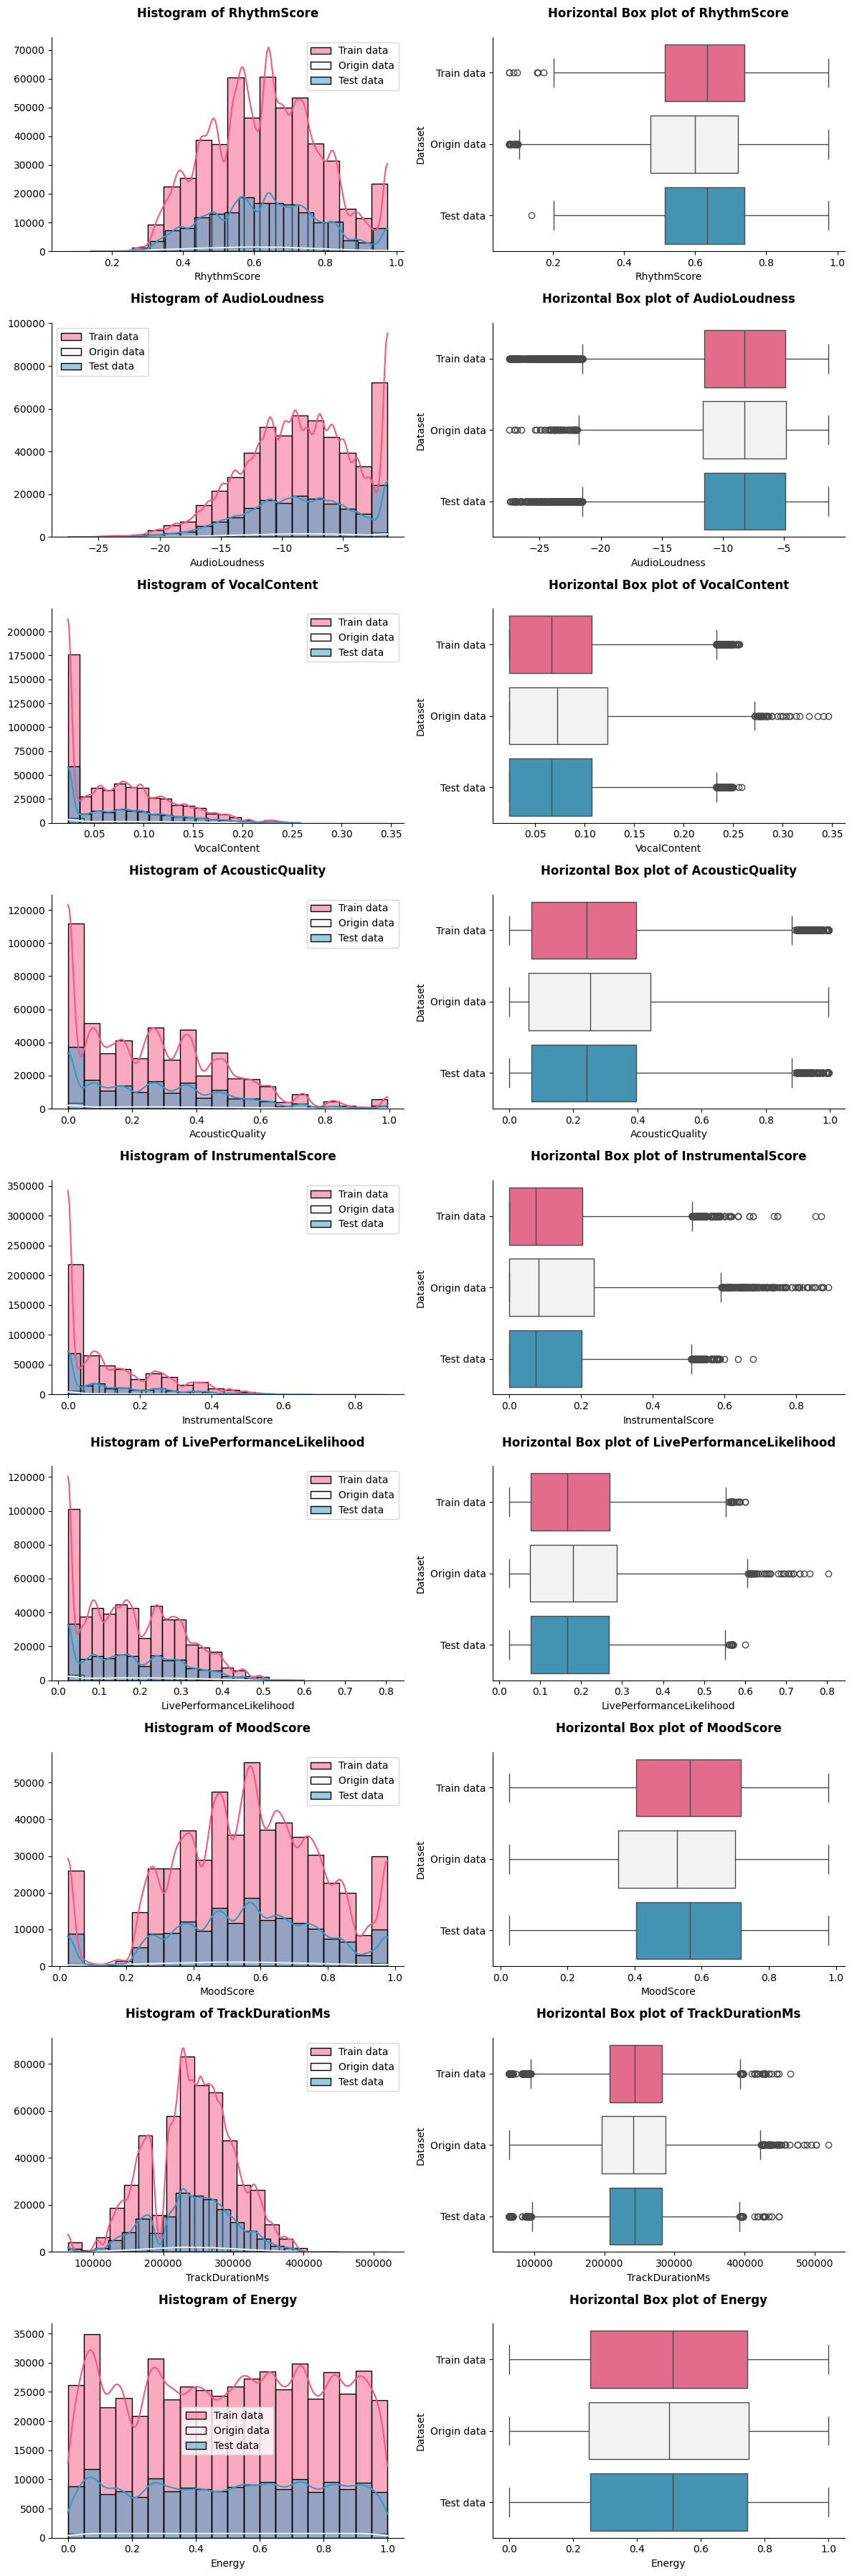

In [15]:
def plot_numerical_features(df_train, df_test, df_origin, num_features):
    colors = color(n_colors=3)
    n = len(num_features)

    fig, ax = plt.subplots(n, 2, figsize=(12, n * 4))
    ax = np.array(ax).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=ax[i, 0], label="Train data")
        sns.histplot(data=df_origin[feature], color=colors[1], bins=20, kde=True, ax=ax[i, 0], label="Origin data")
        sns.histplot(data=df_test[feature], color=colors[2], bins=20, kde=True, ax=ax[i, 0], label="Test data")
        ax[i, 0].set_title(f"Histogram of {feature}", pad=20, weight="bold")
        ax[i, 0].legend()
        ax[i, 0].set_ylabel("")
        sns.despine(left=False, bottom=False, ax=ax[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Origin data", feature: df_origin[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.boxplot(data=df_plot, x=feature, y="Dataset", palette=colors, orient="h", ax=ax[i, 1])
        ax[i, 1].set_title(f"Horizontal Box plot of {feature}", pad=20, weight="bold")
        sns.despine(left=False, bottom=False, ax=ax[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, df_origin = df_origin, num_features=num_features)

In [16]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_origin, skew_origin_df = check_skewness(df_origin, "Original Data")
skew_feature_train, skew_train_df = check_skewness(df_train, "Train Data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data")


🔍 Skewness for Original Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
InstrumentalScore              |   +1.1782 | Highly skewed
VocalContent                   |   +0.8246 | Moderately skewed
AcousticQuality                |   +0.6467 | Moderately skewed
LivePerformanceLikelihood      |   +0.5723 | Moderately skewed
AudioLoudness                  |   -0.3707 | Approximately symmetric
RhythmScore                    |   -0.0977 | Approximately symmetric
MoodScore                      |   -0.0657 | Approximately symmetric
TrackDurationMs                |   +0.0354 | Approximately symmetric
Energy                         |   -0.0023 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature     

### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

* **Histograms** show that most features are concentrated within narrow ranges, though a few display long right tails (e.g., `InstrumentalScore`, `VocalContent`).
* **Boxplots** confirm that central values are stable, with outliers present for several features, especially in `AudioLoudness`, `TrackDurationMs`, and `InstrumentalScore`.

**Skewness Analysis**

* **Highly skewed**: `InstrumentalScore` (skewness > +1), indicating a strong right skew with many low values and few high ones.
* **Moderately skewed**: `VocalContent`, `AcousticQuality`, `LivePerformanceLikelihood` → right skew with concentration near lower values.
* **Approximately symmetric**: `RhythmScore`, `AudioLoudness`, `MoodScore`, `TrackDurationMs`, `Energy` → distributions balanced around the mean.

**Key Insight**

* The dataset overall is **fairly well-behaved**, with only a few skewed variables.
* Features like `InstrumentalScore`, `VocalContent`, and `AcousticQuality` may benefit from **log or Box-Cox transformations or Power Yeo-Johnson** to reduce skewness.
* Most other variables require only **scaling/normalization** before modeling.

## Correlation Analysis of Numerical Features

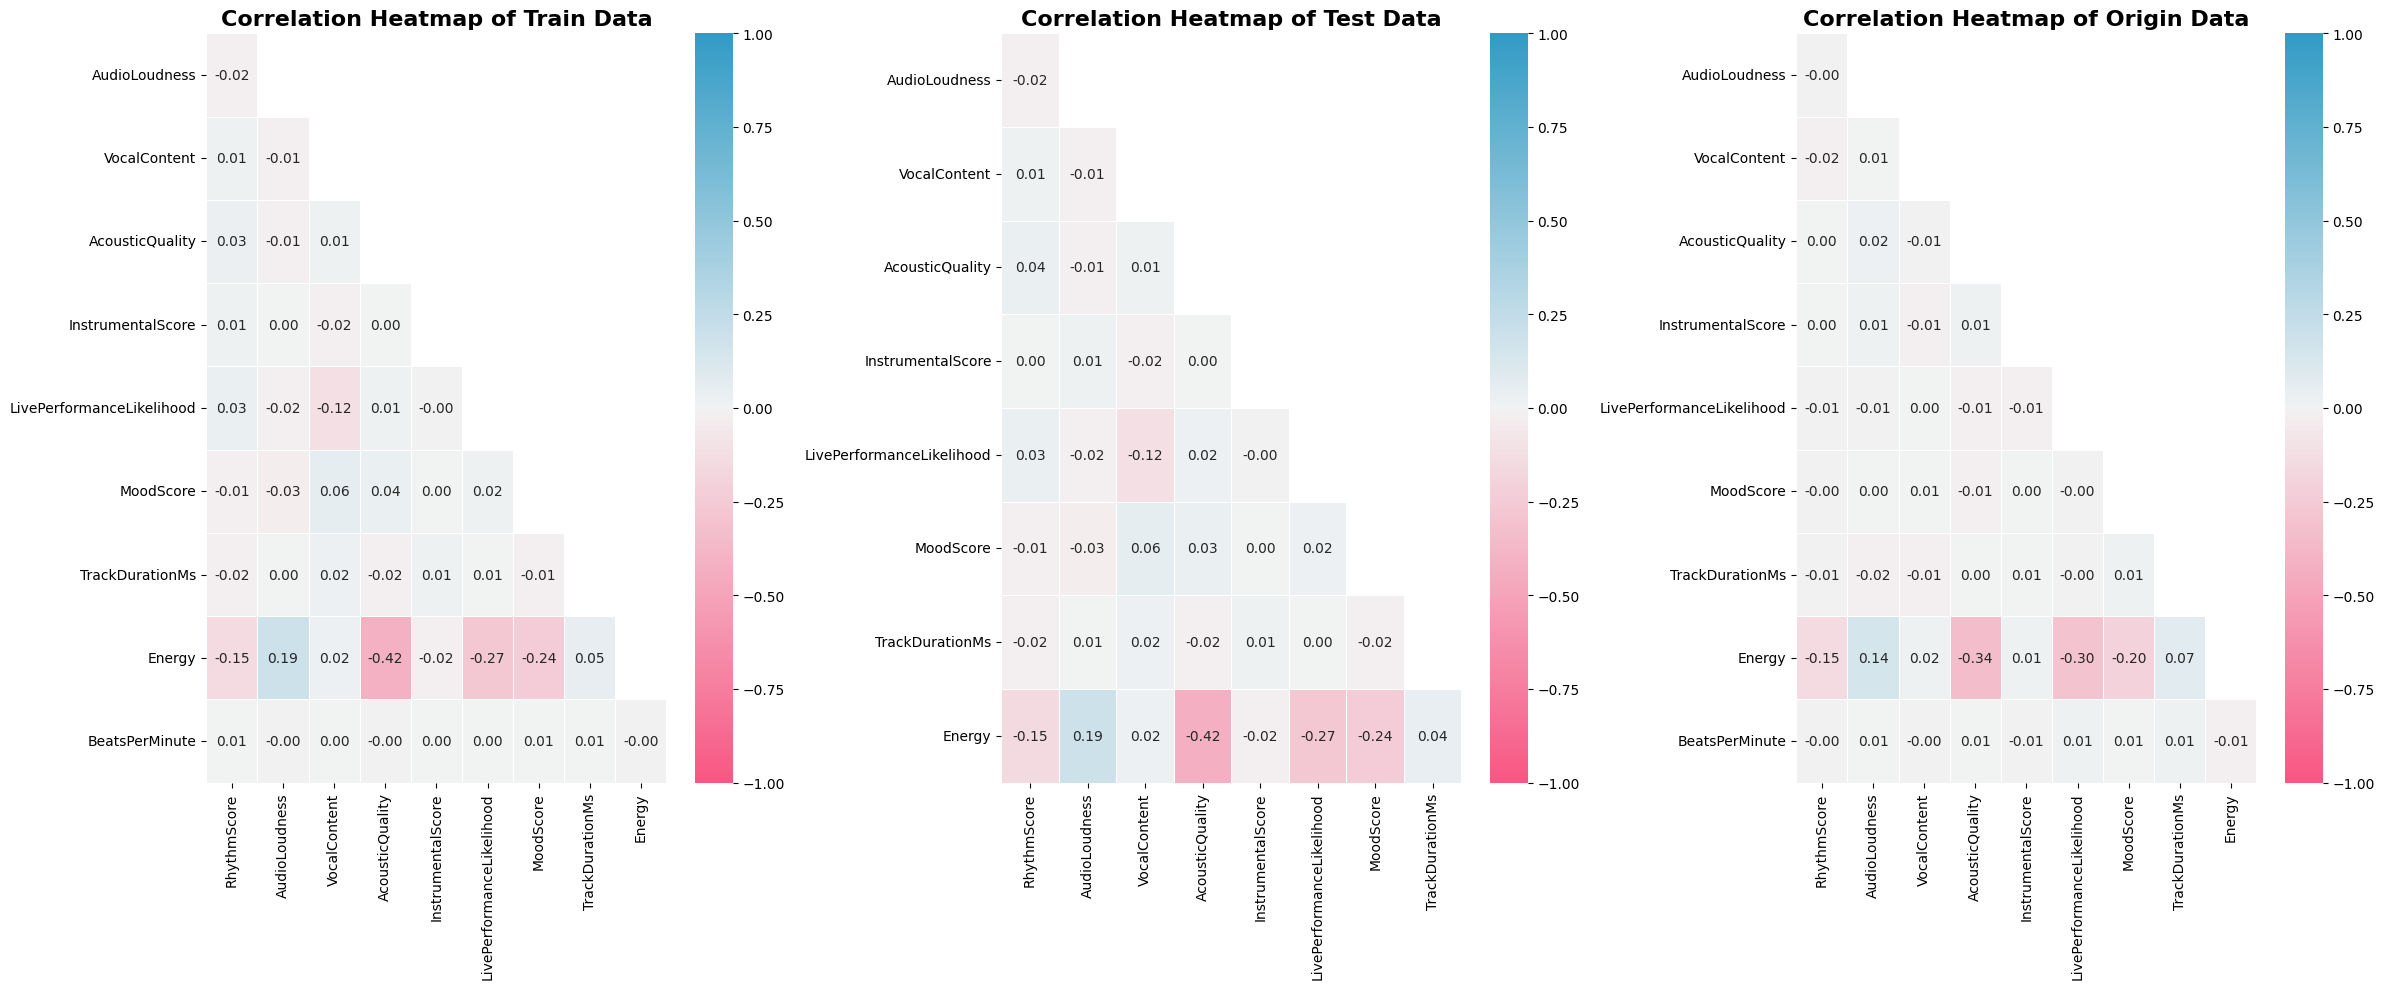

In [17]:
def plot_correlation(df_train, df_origin, df_test, origin_name="Origin Data", train_name="Train Data", test_name="Test Data"):
    corr_train = df_train.corr(numeric_only=True, method="pearson")
    corr_origin = df_origin.corr(numeric_only=True, method="pearson")
    corr_test = df_test.corr(numeric_only=True, method="pearson")

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_origin = np.triu(np.ones_like(corr_origin, dtype=bool))
    adjusted_mask_origin = mask_origin[1:, :-1]
    adjusted_cereal_corr_origin = corr_origin.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 3, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_origin, mask=adjusted_mask_origin,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[2])
    ax[2].set_title(f"Correlation Heatmap of {origin_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation(df_train=df_train,
                 df_origin=df_origin,
                 df_test=df_test)

### **Insights from Correlation Analysis of Numerical Features**

* **Most features show very weak correlations with each other and with `BeatsPerMinute`** (close to 0).
* `Energy` stands out:

  * Slight positive correlation with `AudioLoudness` (\~+0.15 to +0.20).
  * Moderate negative correlation with `AcousticQuality` (~-0.42 to -0.44) and `MoodScore` (~-0.24 to -0.32).
* Other weak relationships: `InstrumentalScore` has a negative link with `LivePerformanceLikelihood` (\~-0.12 to -0.16).
* **Target `BeatsPerMinute` has no strong correlation with any feature** → confirming this is a complex regression problem, not solvable with simple linear relationships.

**In summary:** **no strong multicollinearity**, the dataset is fairly clean, and non-linear models (tree-based, boosting) are likely to perform better than simple linear regression.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


In [18]:
df_merged = pd.concat([df_train, df_origin], axis=0, ignore_index=True)
df_merged = df_merged.reset_index(drop=True)
print("Shape of merged:", df_merged.shape)

Shape of merged: (538797, 10)


## Feature Engineering

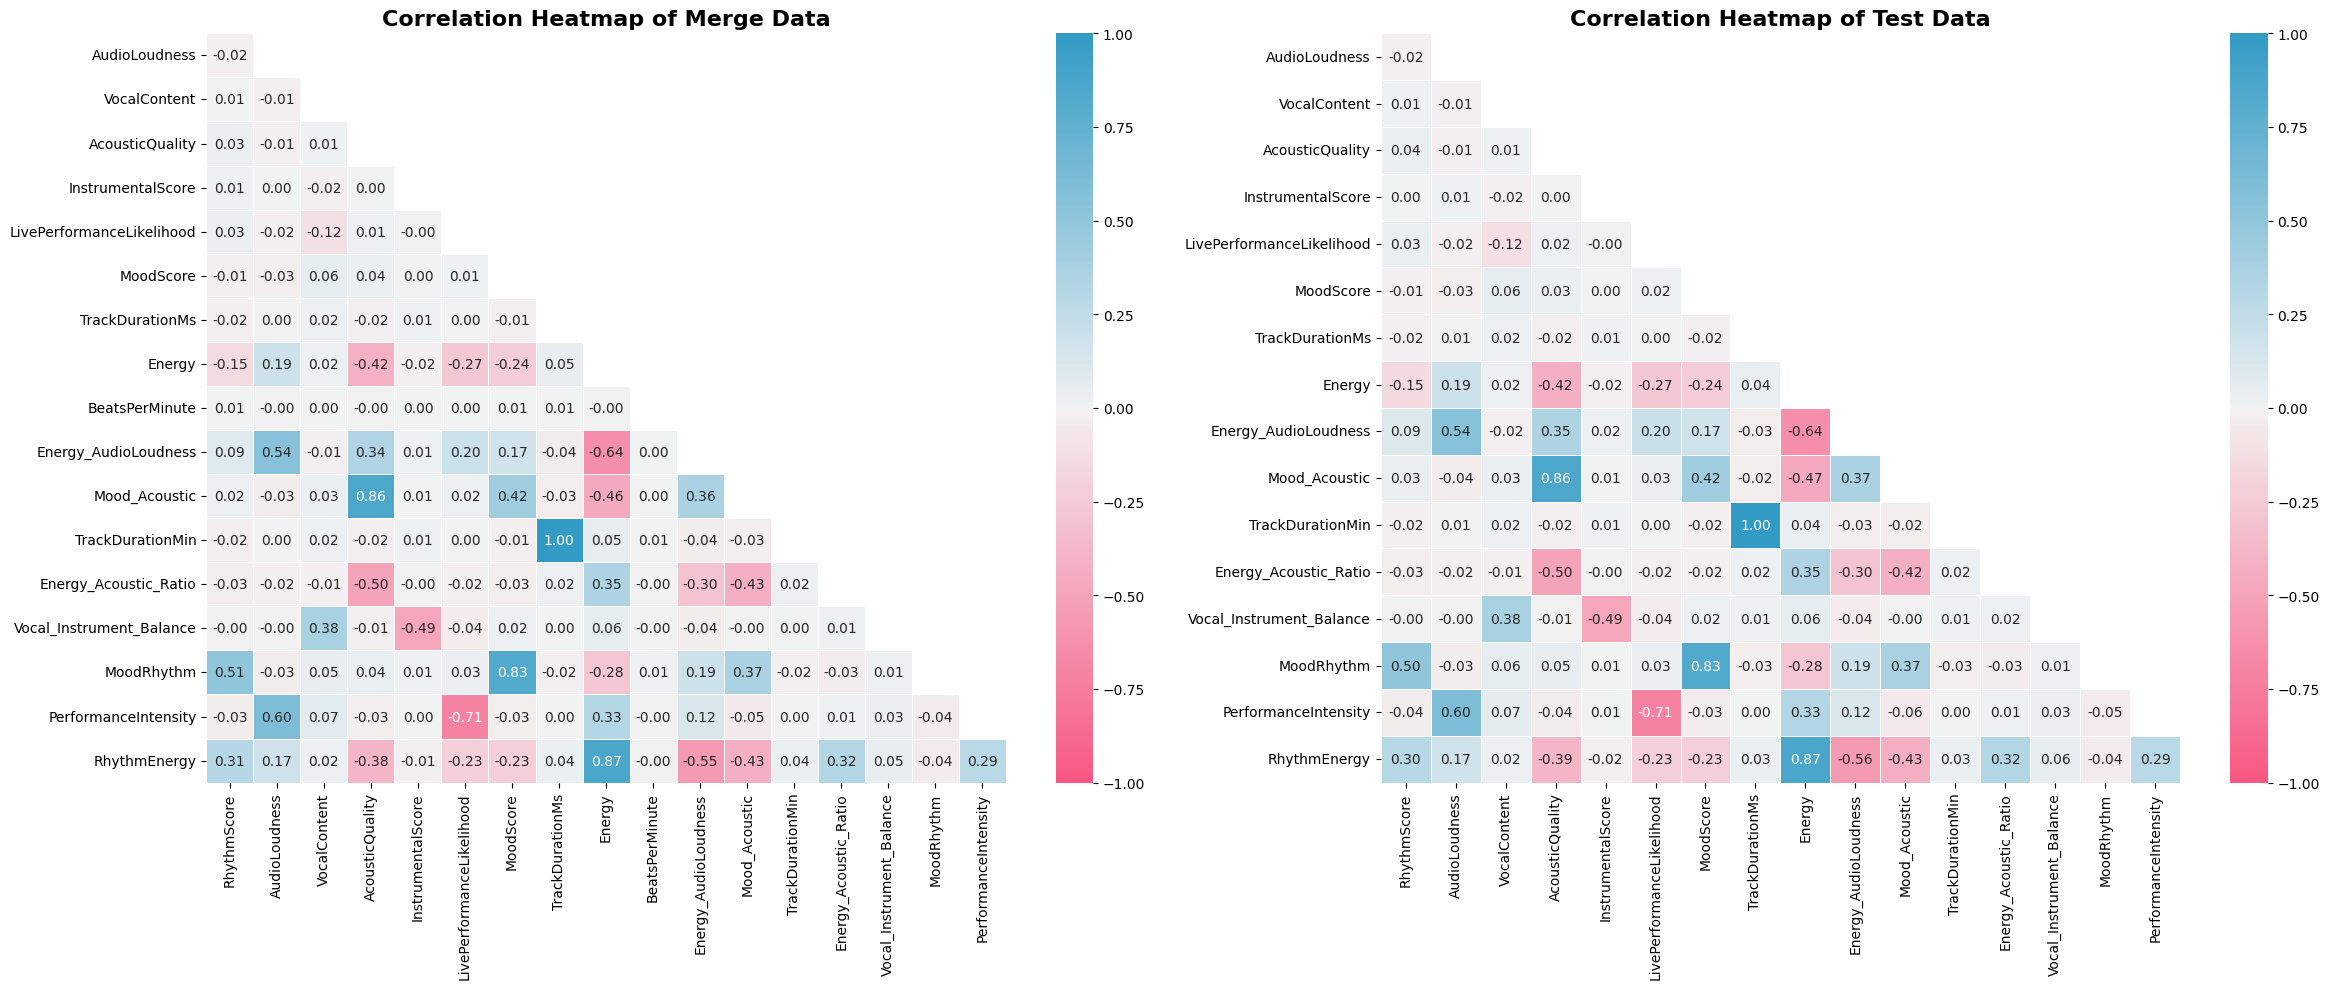

In [20]:
# Combines energy and loudness → represents the “intensity” or strength of the track.
df_merged["Energy_AudioLoudness"] = df_merged["Energy"] * df_merged["AudioLoudness"]
df_test["Energy_AudioLoudness"] = df_test["Energy"] * df_test["AudioLoudness"]

# Combines mood score and acoustic quality → captures the “acoustic emotion” (e.g., sad acoustic ballad or cheerful acoustic music).
df_merged["Mood_Acoustic"] = df_merged["MoodScore"] * df_merged["AcousticQuality"]
df_test["Mood_Acoustic"] = df_test["MoodScore"] * df_test["AcousticQuality"]

# The track duration expressed in minutes (converted from milliseconds).
df_merged["TrackDurationMin"] = df_merged["TrackDurationMs"] / 60000
df_test["TrackDurationMin"] = df_test["TrackDurationMs"] / 60000

# The ratio of overall energy to acoustic quality.
df_merged["Energy_Acoustic_Ratio"] = df_merged["Energy"] / (df_merged["AcousticQuality"] + 1e-5)
df_test["Energy_Acoustic_Ratio"] = df_test["Energy"] / (df_test["AcousticQuality"] + 1e-5)

# Measures the balance between vocal and instrumental elements.
df_merged["Vocal_Instrument_Balance"] = df_merged["VocalContent"] / (df_merged["InstrumentalScore"] + 1e-5)
df_test["Vocal_Instrument_Balance"] = df_test["VocalContent"] / (df_test["InstrumentalScore"] + 1e-5)

# Captures the alignment between the track’s mood and rhythm.
df_merged["MoodRhythm"] = df_merged["MoodScore"] * df_merged["RhythmScore"]
df_test["MoodRhythm"] = df_test["MoodScore"] * df_test["RhythmScore"]

# Represents the intensity of performance, combining the likelihood of live performance with loudness.
df_merged["PerformanceIntensity"] = df_merged["LivePerformanceLikelihood"] * df_merged["AudioLoudness"]
df_test["PerformanceIntensity"] = df_test["LivePerformanceLikelihood"] * df_test["AudioLoudness"]

# The energy level amplified by rhythm.
df_merged["RhythmEnergy"] = df_merged["RhythmScore"] * df_merged["Energy"]
df_test["RhythmEnergy"] = df_test["RhythmScore"] * df_test["Energy"]

def plot_correlation(df_merge, df_test, merge_name="Merge Data", test_name="Test Data"):
    corr_merge = df_merge.corr(numeric_only=True, method="pearson")
    corr_test = df_test.corr(numeric_only=True, method="pearson")

    mask_merge = np.triu(np.ones_like(corr_merge, dtype=bool))
    adjusted_mask_merge = mask_merge[1:, :-1]
    adjusted_cereal_corr_merge = corr_merge.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 2, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_merge, mask=adjusted_mask_merge,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {merge_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation(df_merge=df_merged, df_test=df_test)

**Key Correlation Patterns**

**Original Features**

* **Energy** shows a notable negative correlation with `AcousticQuality` (\~ -0.42) → high-energy tracks tend to be less acoustic.
* **AudioLoudness** is positively correlated with both `Energy` and `PerformanceIntensity` (\~ 0.54–0.60).
* **RhythmScore** has a strong correlation with `RhythmEnergy` (\~ 0.87).

**Engineered Features**

* `Mood_Acoustic` is very strongly correlated with both `MoodScore` and `AcousticQuality` (\~ 0.86), which makes sense since it is derived from their product.
* `RhythmEnergy` shows a strong relationship with `Energy` (\~ 0.87) and a moderate one with `RhythmScore` (\~ 0.31).
* `PerformanceIntensity` is strongly related to `AudioLoudness` (\~ 0.60) and negatively correlated with `LivePerformanceLikelihood` (\~ -0.71).
* `Energy_AudioLoudness` correlates well with both `Energy` and `AudioLoudness` (\~ 0.54–0.64).
* `MoodRhythm` is highly correlated with `MoodScore` (\~ 0.83).

**Comparison Between Merged and Test Data**

* The correlation structures in the Merged Data and Test Data are **almost identical**, suggesting consistent data distribution without evidence of data leakage or major domain shift.
* Minor value differences (±0.01–0.02) exist, but overall trends and magnitudes remain stable.

**Practical Implications**

* The engineered features capture **composite characteristics** (Mood–Rhythm, Rhythm–Energy, Mood–Acoustic, Performance–Loudness).
* Some variables are highly correlated with their sources (e.g., `Mood_Acoustic` with `MoodScore`), so multicollinearity should be monitored in linear models.
* For tree-based models (XGBoost, LightGBM, RandomForest), these additional features can enrich the signal for classification or prediction.
* The heatmap confirms that engineered features align logically with original variables, validating the feature engineering step.

***In short: the training and test datasets are consistent; the engineered features are meaningful and logically connected to their base features; while some multicollinearity exists, these features can still provide valuable signals, especially for non-linear models.***

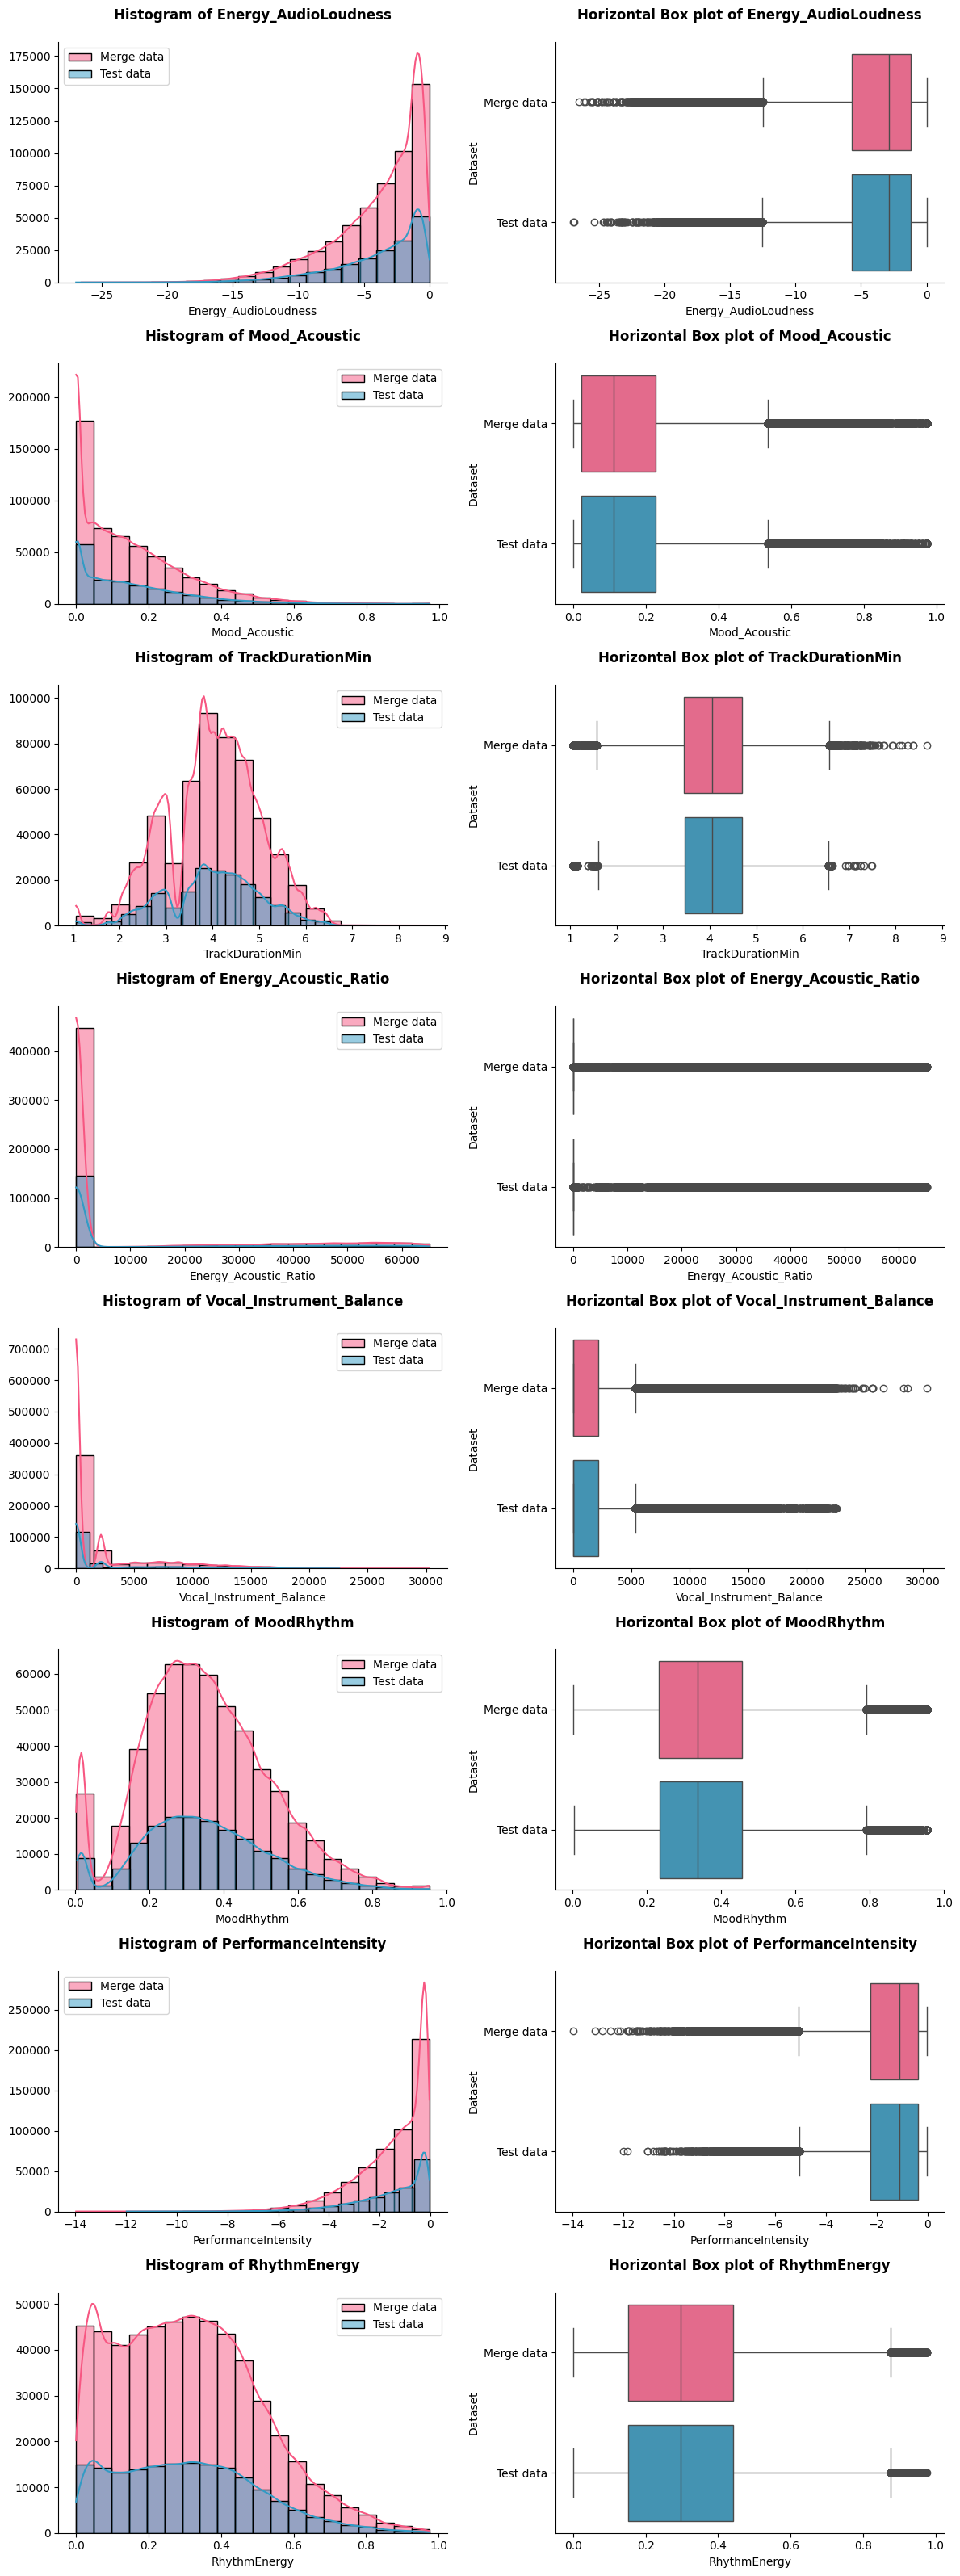

In [21]:
new_features = ["Energy_AudioLoudness", "Mood_Acoustic", "TrackDurationMin", "Energy_Acoustic_Ratio", 
                "Vocal_Instrument_Balance", "MoodRhythm", "PerformanceIntensity", "RhythmEnergy"]

def plot_numerical_new_features(df_merged, df_test, num_features):
    colors = color(n_colors=2)
    n = len(num_features)

    fig, ax = plt.subplots(n, 2, figsize=(12, n * 4))
    ax = np.array(ax).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_merged[feature], color=colors[0], bins=20, kde=True, ax=ax[i, 0], label="Merge data")
        sns.histplot(data=df_test[feature], color=colors[1], bins=20, kde=True, ax=ax[i, 0], label="Test data")
        ax[i, 0].set_title(f"Histogram of {feature}", pad=20, weight="bold")
        ax[i, 0].legend()
        ax[i, 0].set_ylabel("")
        sns.despine(left=False, bottom=False, ax=ax[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Merge data", feature: df_merged[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.boxplot(data=df_plot, x=feature, y="Dataset", palette=colors, orient="h", ax=ax[i, 1])
        ax[i, 1].set_title(f"Horizontal Box plot of {feature}", pad=20, weight="bold")
        sns.despine(left=False, bottom=False, ax=ax[i, 1])

    plt.tight_layout()
    plt.show()
plot_numerical_new_features(df_merged = df_merged, df_test = df_test, num_features=new_features)

**Analysis by Feature**

a. `Energy_AudioLoudness`

* **Histogram**: left-skewed distribution, most values between -10 and 0.
* **Boxplot**: noticeable outliers on the lower side (< -20).
* **Note**: Merged and Test Data match well, distribution is stable.

b. `Mood_Acoustic`

* **Histogram**: strongly right-skewed, most values near 0.
* **Boxplot**: several outliers at higher values (> 0.5).
* **Note**: Almost identical distributions in train and test, but sparse signal.

c. `TrackDurationMin`

* **Histogram**: approximately normal, concentrated around 3–5 minutes.
* **Boxplot**: few outliers, fairly balanced.
* **Note**: One of the most stable variables, not heavily skewed.

d. `Energy_Acoustic_Ratio`

* **Histogram**: heavily right-skewed with extreme long-tail values.
* **Boxplot**: dominated by outliers, highly unbalanced distribution.
* **Note**: Requires transformation (e.g., log-scaling) for linear models.

e. `Vocal_Instrument_Balance`

* **Histogram**: right-skewed, majority near 0 with some very high spikes.
* **Boxplot**: many outliers present.
* **Note**: Heavy-tailed distribution, potentially problematic for regression.

f. `MoodRhythm`

* **Histogram**: bell-shaped but slightly right-skewed, concentrated at 0.2–0.5.
* **Boxplot**: compact, few outliers.
* **Note**: Stable and meaningful variable.

g. `PerformanceIntensity`

* **Histogram**: left-skewed, most values near 0 with some very low (-14).
* **Boxplot**: several negative outliers.
* **Note**: Train and test consistent, but negative scale should be noted.

h. `RhythmEnergy`

* **Histogram**: fairly even distribution from 0–1, slightly concentrated at 0.2–0.6.
* **Boxplot**: compact, few outliers.
* **Note**: Clean and stable feature, good for capturing rhythm + energy.

**Merged vs. Test Data Comparison**

* **Distribution shape**: Most variables have very similar distributions between Merged and Test Data.
* **Differences**: Slight variations appear in the tails (outliers), but not substantial.
* **Conclusion**: No strong domain shift → good conditions for stable model training.

**Practical Implications**

* Features like `MoodRhythm`, `RhythmEnergy`, and `TrackDurationMin` are stable and model-friendly.
* Heavy-tailed features (`Energy_Acoustic_Ratio`, `Vocal_Instrument_Balance`, `PerformanceIntensity`) require preprocessing (e.g., scaling, transformation) or robust models (e.g., tree-based).
* Train/test comparison shows no major data drift, ensuring model applicability.

***In short: the dataset is consistent between train and test; some engineered features are heavy-tailed and need preprocessing, while others are clean and stable, enriching the dataset with useful signals for modeling.***

## Handling Skewness

In [22]:
num_features = ["RhythmScore", "AudioLoudness", "VocalContent", "AcousticQuality", "InstrumentalScore", "LivePerformanceLikelihood",
                "MoodScore", "TrackDurationMs", "Energy", "Energy_AudioLoudness", "Mood_Acoustic", "BeatsPerMinute", "TrackDurationMin", 
                "Energy_Acoustic_Ratio", "Vocal_Instrument_Balance", "MoodRhythm", "PerformanceIntensity", "RhythmEnergy"]
skew_feature_merge, skew_merge_df = check_skewness(data=df_merged, dataset_name="Merge Data",
                                                   numerical_features=num_features)


🔍 Skewness for Merge Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Energy_Acoustic_Ratio          |   +2.1143 | Highly skewed
Vocal_Instrument_Balance       |   +1.9771 | Highly skewed
PerformanceIntensity           |   -1.3936 | Highly skewed
Mood_Acoustic                  |   +1.3193 | Highly skewed
Energy_AudioLoudness           |   -1.3135 | Highly skewed
InstrumentalScore              |   +1.0489 | Highly skewed
VocalContent                   |   +0.7959 | Moderately skewed
AcousticQuality                |   +0.7822 | Moderately skewed
RhythmEnergy                   |   +0.4828 | Approximately symmetric
LivePerformanceLikelihood      |   +0.4036 | Approximately symmetric
MoodRhythm                     |   +0.3552 | Approximately symmetric
AudioLoudness                  |   -0.3104 | Approximately symmetric
MoodScore             

In [23]:
num_features_test = ["RhythmScore", "AudioLoudness", "VocalContent", "AcousticQuality", "InstrumentalScore", "LivePerformanceLikelihood",
                "MoodScore", "TrackDurationMs", "Energy", "Energy_AudioLoudness", "Mood_Acoustic", "TrackDurationMin", 
                "Energy_Acoustic_Ratio", "Vocal_Instrument_Balance", "MoodRhythm", "PerformanceIntensity", "RhythmEnergy"]
skew_feature_test, skew_test_df = check_skewness(data=df_test, dataset_name="Test Data",
                                                 numerical_features=num_features_test)


🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Energy_Acoustic_Ratio          |   +2.1246 | Highly skewed
Vocal_Instrument_Balance       |   +1.9807 | Highly skewed
PerformanceIntensity           |   -1.3979 | Highly skewed
Mood_Acoustic                  |   +1.3232 | Highly skewed
Energy_AudioLoudness           |   -1.3194 | Highly skewed
InstrumentalScore              |   +1.0427 | Highly skewed
VocalContent                   |   +0.7932 | Moderately skewed
AcousticQuality                |   +0.7866 | Moderately skewed
RhythmEnergy                   |   +0.4840 | Approximately symmetric
LivePerformanceLikelihood      |   +0.4008 | Approximately symmetric
MoodRhythm                     |   +0.3502 | Approximately symmetric
AudioLoudness                  |   -0.3134 | Approximately symmetric
MoodScore              

In [24]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()
    
    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            print("AAA")
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [25]:
processed_merge_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_merged, num_features=skew_feature_merge)
num_features = ["RhythmScore", "AudioLoudness", "PT_VocalContent", "PT_AcousticQuality", "PT_InstrumentalScore", "LivePerformanceLikelihood",
                "MoodScore", "TrackDurationMs", "Energy", "PT_Energy_AudioLoudness", "PT_Mood_Acoustic", "BeatsPerMinute", "TrackDurationMin", 
                "PT_Energy_Acoustic_Ratio", "PT_Vocal_Instrument_Balance", "MoodRhythm", "PT_PerformanceIntensity", "RhythmEnergy"]
skew_feature_merge, skew_merge_df = check_skewness(data=processed_merge_df, dataset_name="Merge Data", numerical_features=num_features)


🔍 Skewness for Merge Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
PT_Energy_Acoustic_Ratio       |   +0.7498 | Moderately skewed
PT_Vocal_Instrument_Balance    |   +0.5815 | Moderately skewed
RhythmEnergy                   |   +0.4828 | Approximately symmetric
LivePerformanceLikelihood      |   +0.4036 | Approximately symmetric
MoodRhythm                     |   +0.3552 | Approximately symmetric
AudioLoudness                  |   -0.3104 | Approximately symmetric
PT_InstrumentalScore           |   +0.2817 | Approximately symmetric
MoodScore                      |   -0.2637 | Approximately symmetric
PT_Mood_Acoustic               |   +0.1833 | Approximately symmetric
TrackDurationMin               |   -0.1819 | Approximately symmetric
TrackDurationMs                |   -0.1819 | Approximately symmetric
PT_VocalContent                

In [26]:
processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test = handle_skewed_features(df=df_test, num_features=skew_feature_test)
num_features = ["RhythmScore", "AudioLoudness", "PT_VocalContent", "PT_AcousticQuality", "PT_InstrumentalScore", "LivePerformanceLikelihood",
                "MoodScore", "TrackDurationMs", "Energy", "PT_Energy_AudioLoudness", "PT_Mood_Acoustic", "TrackDurationMin", 
                "PT_Energy_Acoustic_Ratio", "PT_Vocal_Instrument_Balance", "MoodRhythm", "PT_PerformanceIntensity", "RhythmEnergy"]
skew_feature_test, skew_test_df = check_skewness(data=processed_test_df, numerical_features=num_features, dataset_name= "Test data")


🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
PT_Energy_Acoustic_Ratio       |   +0.7467 | Moderately skewed
PT_Vocal_Instrument_Balance    |   +0.5861 | Moderately skewed
RhythmEnergy                   |   +0.4840 | Approximately symmetric
LivePerformanceLikelihood      |   +0.4008 | Approximately symmetric
MoodRhythm                     |   +0.3502 | Approximately symmetric
AudioLoudness                  |   -0.3134 | Approximately symmetric
PT_InstrumentalScore           |   +0.2811 | Approximately symmetric
MoodScore                      |   -0.2739 | Approximately symmetric
TrackDurationMs                |   -0.1891 | Approximately symmetric
TrackDurationMin               |   -0.1891 | Approximately symmetric
PT_Mood_Acoustic               |   +0.1827 | Approximately symmetric
PT_VocalContent                |

**Observations from the Skewness Table (`processed_merge_df` and `processed_test_df`):**

**Skewed**:

* The features `Energy_Acoustic_Ratio `, `Vocal_Instrument_Balance`, `InstrumentalScore`, `Mood_Acoustic`, `PerformanceIntensity`, `AcousticQuality`, `Energy_AudioLoudness` and `VocalContent` exhibit skewness.

**Approximately Symmetric**:

* Several features, such as:

  * `PT_Energy_Acoustic_Ratio `, `PT_Vocal_Instrument_Balance`, `PT_InstrumentalScore`, `PT_Mood_Acoustic`, `PT_PerformanceIntensity`, `PT_AcousticQuality`, `PT_Energy_AudioLoudness` and `PT_VocalContent` close to zero.
  * This indicates that **Yeo-Johnson transformation was effective** for this feature.

## Re-check Outlier

In [27]:
checking_outlier(list_feature=num_features, df=processed_merge_df, dataset_name="Merge data")

🔍 Merge data Checking outlier


,Feature,Outlier Count
0,RhythmScore,155
1,AudioLoudness,1787
2,LivePerformanceLikelihood,248
3,TrackDurationMs,4639
4,TrackDurationMin,4639
5,MoodRhythm,5689
6,RhythmEnergy,2506


In [28]:
checking_outlier(list_feature=num_features, df=processed_test_df, dataset_name="Test data")

🔍 Test data Checking outlier


,Feature,Outlier Count
0,RhythmScore,1
1,AudioLoudness,614
2,LivePerformanceLikelihood,43
3,TrackDurationMs,1397
4,TrackDurationMin,1397
5,MoodRhythm,1858
6,RhythmEnergy,849


**Insight**

***Both the training and test datasets contain outliers in four features: `RhythmScore`, `AudioLoudness`, `LivePerformanceLikelihood`,  `TrackDurationMs`, `TrackDurationMin`, `MoodRhythm` and `RhythmEnergy`. We will use RobustScaler to reduce the impact of these outliers.***

## Create Test Set

Suppose we chatted with experts who told us that the **PT_Mood_Acoustic** is a very important attribute to predict **BeatsPerMinute**. We may want to ensure that the test set is representative of the various categories of **PT_Mood_Acoustic** in the whole dataset. Since the **PT_Mood_Acoustic** is a continuous numerical attribute, we first need to create an category attribute.

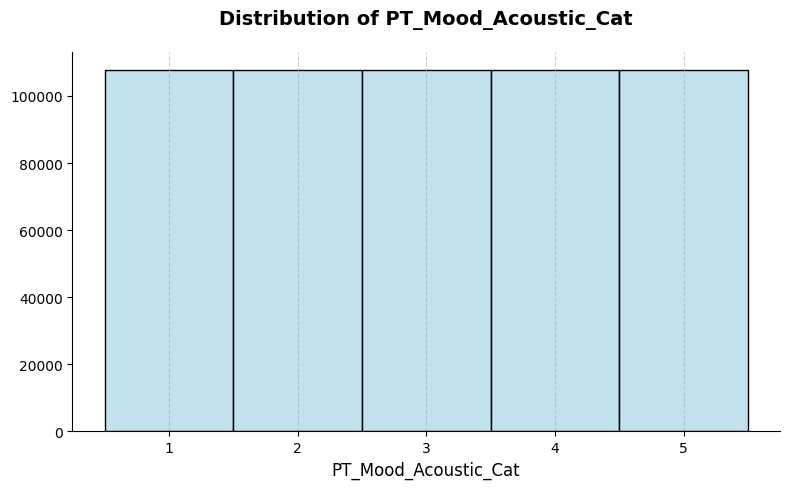

In [29]:
processed_merge_df["PT_Mood_Acoustic_Cat"] = pd.qcut(processed_merge_df["PT_Mood_Acoustic"],
                                              q=5,
                                              labels=[1, 2, 3, 4, 5])

plt.figure(figsize=(8, 5))
sns.histplot(data=processed_merge_df, x="PT_Mood_Acoustic_Cat", color="lightblue", edgecolor="black")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of PT_Mood_Acoustic_Cat", fontsize=14, weight="bold", pad=20)
plt.xlabel("PT_Mood_Acoustic_Cat", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_merge_df, processed_merge_df["PT_Mood_Acoustic_Cat"]):
    start_train_set = processed_merge_df.iloc[train_index]
    start_test_set = processed_merge_df.iloc[test_index]

## Scale and Ecode

In [31]:
# Now we should remove the PT_Mood_Acoustic_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("PT_Mood_Acoustic_Cat", axis=1, inplace=True)

In [32]:
df_train_new = start_train_set.drop("BeatsPerMinute", axis=1)
df_train_label_new = start_train_set["BeatsPerMinute"].copy()

In [34]:
list_feature_num_robust = ["RhythmScore","AudioLoudness", "LivePerformanceLikelihood", "TrackDurationMs", "TrackDurationMin", 
                           "MoodRhythm", "RhythmEnergy"]
list_feature_num_stand = ["PT_VocalContent", "PT_AcousticQuality", "PT_InstrumentalScore",
                "MoodScore", "Energy", "PT_Energy_AudioLoudness", "PT_Mood_Acoustic",
                "PT_Energy_Acoustic_Ratio", "PT_Vocal_Instrument_Balance", "PT_PerformanceIntensity"]

num_robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_stand", num_stand_transformer, list_feature_num_stand)
])

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['RhythmScore', 'AudioLoudness',
                                  'LivePerformanceLikelihood',
                                  'TrackDurationMs', 'TrackDurationMin',
                                  'MoodRhythm', 'RhythmEnergy']),
                                ('num_stand',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['PT_VocalContent', 'PT_AcousticQuality',
                                  'PT_InstrumentalScore', 'MoodScore', 'Energy',
                                  'PT_Energy_AudioLoudness', 'PT_Mood_Acoustic',
                                  'PT_Energy_Acoustic_Ratio',
                                  'PT_Vocal_Instrument_Balance',
                                  'PT_PerformanceIntensity'])])

In [35]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__RhythmScore',
 'num_robust__AudioLoudness',
 'num_robust__LivePerformanceLikelihood',
 'num_robust__TrackDurationMs',
 'num_robust__TrackDurationMin',
 'num_robust__MoodRhythm',
 'num_robust__RhythmEnergy',
 'num_stand__PT_VocalContent',
 'num_stand__PT_AcousticQuality',
 'num_stand__PT_InstrumentalScore',
 'num_stand__MoodScore',
 'num_stand__Energy',
 'num_stand__PT_Energy_AudioLoudness',
 'num_stand__PT_Mood_Acoustic',
 'num_stand__PT_Energy_Acoustic_Ratio',
 'num_stand__PT_Vocal_Instrument_Balance',
 'num_stand__PT_PerformanceIntensity']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

## **Root Mean Squared Error (RMSE)**

**Definition:**

**RMSE (Root Mean Squared Error)** is a metric used to measure the average deviation between a model’s predicted values and the actual values. The lower the RMSE, the better the model's predictions.

**Formula:**

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

* $y_i$: Actual value
* $\hat{y}_i$: Predicted value
* $n$: Number of observations

**Characteristics:**

* RMSE is **always non-negative** (≥ 0).
* The closer RMSE is to **0**, the better the model.
* RMSE is **sensitive to outliers** due to squaring the errors.

**References:**

* [Kaggle Evaluation Page](https://www.kaggle.com/discussions/general/215997)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Modeling</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Modeling
    </h1>
</div>

In [36]:
def shap_plot(model, X_test, list_feature, type = None):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance", fontsize=14, weight="bold", pad=20)
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [37]:
# Function to evaluate regression models
def evaluate_model(model, X_train, X_val, y_train, y_val, show_shap_plot = True):
    RESET = "\033[0m"
    BLUE = "\033[94m"
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_val_real = y_val
    y_pred_real = y_pred
    
    # Metrics: RMSE
    rmse = np.sqrt(mean_squared_error(y_val_real, y_pred_real))
    print(f"Model: {model.__class__.__name__}{RESET}")
    print(f"Root Mean Squared Error (RMSE): {BLUE}{rmse:.4f}{RESET}")
    print("-" * 80)

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    # ----- Plot 1: Predicted vs. Actual -----
    axs[0].scatter(y_val_real, y_pred_real, alpha=0.4, color="royalblue")
    axs[0].plot(
        [y_val_real.min(), y_val_real.max()],
        [y_val_real.min(), y_val_real.max()],
        "r--", lw=2, label="Perfect Prediction (y=x)"
    )
    axs[0].set_xlabel("Actual Values (BeatsPerMinute)")
    axs[0].set_ylabel("Predicted Values (BeatsPerMinute)")
    axs[0].set_title("Predicted vs. Actual (Validation Set)", fontsize=14, weight="bold", pad=20)
    axs[0].legend()
    axs[0].grid(True, alpha=0.2)

    # ----- Plot 2: Residual Plot -----
    residuals = y_val_real - y_pred_real
    axs[1].scatter(y_val_real, residuals, alpha=0.5)
    axs[1].axhline(0, color="red", linestyle="--", lw=2)
    axs[1].set_xlabel("Actual Values (BeatsPerMinute)")
    axs[1].set_ylabel("Prediction Error (Residuals)")
    axs[1].set_title("Residual Plot", fontsize=14, weight="bold", pad=20)
    axs[1].grid(True, alpha=0.2)

    plt.tight_layout()
    plt.show() 

    if show_shap_plot:
        shap_plot(model = model, X_test = X_val, list_feature = list_feature_prepared)

    return rmse

In [38]:
X_val = start_test_set.drop("BeatsPerMinute", axis=1)
y_val = start_test_set["BeatsPerMinute"].copy()
X_val_prepared = preprocessor.transform(X_val)

## Ridge

In [54]:
from sklearn.linear_model import Ridge

param_ridge = {
    "alpha": 9999.679917972731, 
    "fit_intercept": True, 
    "tol": 5.6573144072058315e-05, 
    "max_iter": 11944,
    "solver": "auto",
    "random_state": 42,
}

model_ridge = Ridge(**param_ridge)
model_ridge

Ridge(alpha=9999.679917972731, max_iter=11944, random_state=42,
      tol=5.6573144072058315e-05)

Model: Ridge
Root Mean Squared Error (RMSE): 26.4575
--------------------------------------------------------------------------------


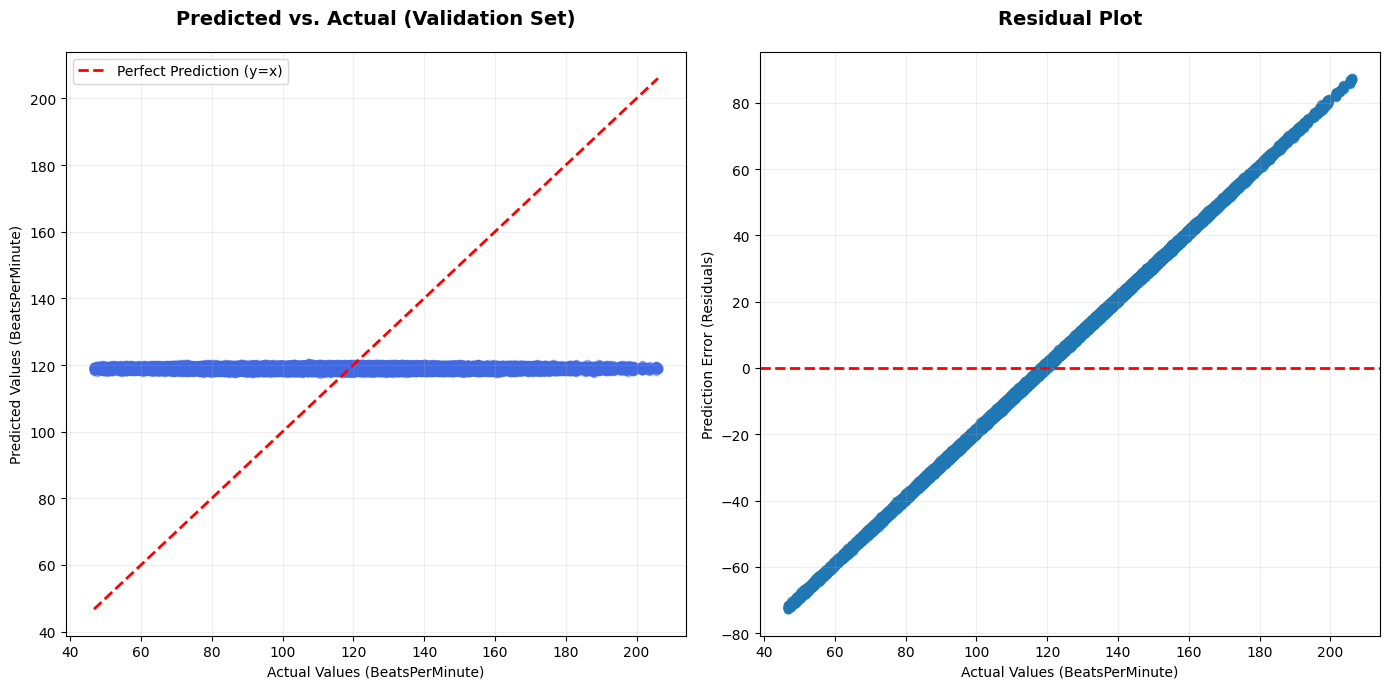

In [55]:
weight_rmse_ridge = evaluate_model(model = model_ridge, X_train = df_train_new_prepared, 
                   X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

## Lasso

In [50]:
from sklearn.linear_model import Lasso

param_lasso = {
    "alpha": 0.0033159447142899045, 
    "fit_intercept": True, 
    "tol": 0.0007706141125664155, 
    "max_iter": 18300, 
    "selection": "random", 
    "warm_start": True, 
    "positive": True,
    "random_state": 42
}

model_lasso = Lasso(**param_lasso)
model_lasso

Lasso(alpha=0.0033159447142899045, max_iter=18300, positive=True,
      random_state=42, selection='random', tol=0.0007706141125664155,
      warm_start=True)

Model: Lasso
Root Mean Squared Error (RMSE): 26.4576
--------------------------------------------------------------------------------


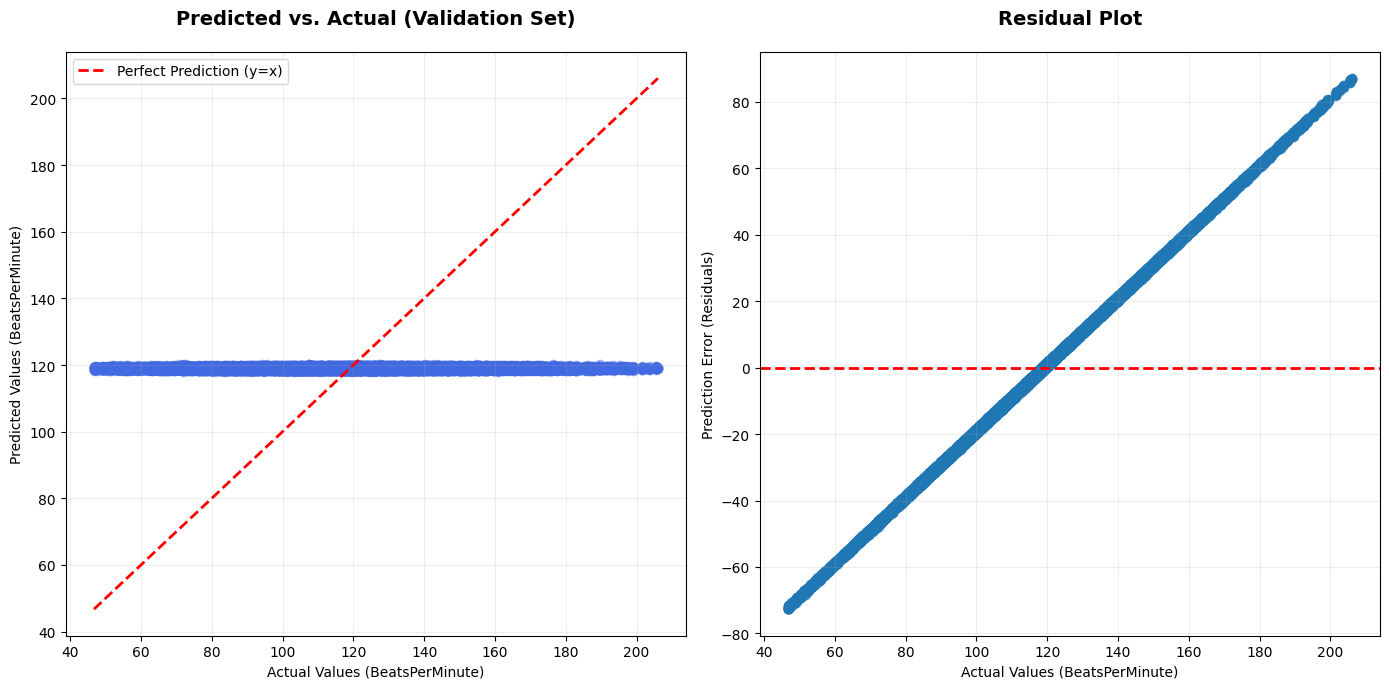

In [51]:
weight_rmse_lasso = evaluate_model(model = model_lasso, X_train = df_train_new_prepared, 
                   X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

## VotingClassifier

In [ ]:
from sklearn.ensemble import VotingRegressor
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
voting_reg = VotingRegressor(estimators=[
    ("cb", model_cb),
    ("xgb", model_xgb),
    ("lgbm", model_lgbm),
    ("ridge", model_ridge),
    ("lasso", model_lasso),
], n_jobs=1, weights=[weight_rmse_cb, weight_rmse_xgb, weight_rmse_lgbm, weight_rmse_ridge, weight_rmse_lasso])

cv_scores = cross_val_score(
    voting_reg,
    X=df_train_new_prepared,
    y=df_train_label_new,
    cv=kfold,
    scoring="neg_root_mean_squared_error",
    n_jobs=1
)

mean_score = -cv_scores.mean()
std_score = cv_scores.std()

print(f"Cross-validated RMSE (mean ± std): {mean_score:.4f} ± {std_score:.4f}")

Cross-validated RMSE (mean ± std): 26.4666 ± 0.0239


Model: VotingRegressor
Root Mean Squared Error (RMSE): 26.4528
--------------------------------------------------------------------------------


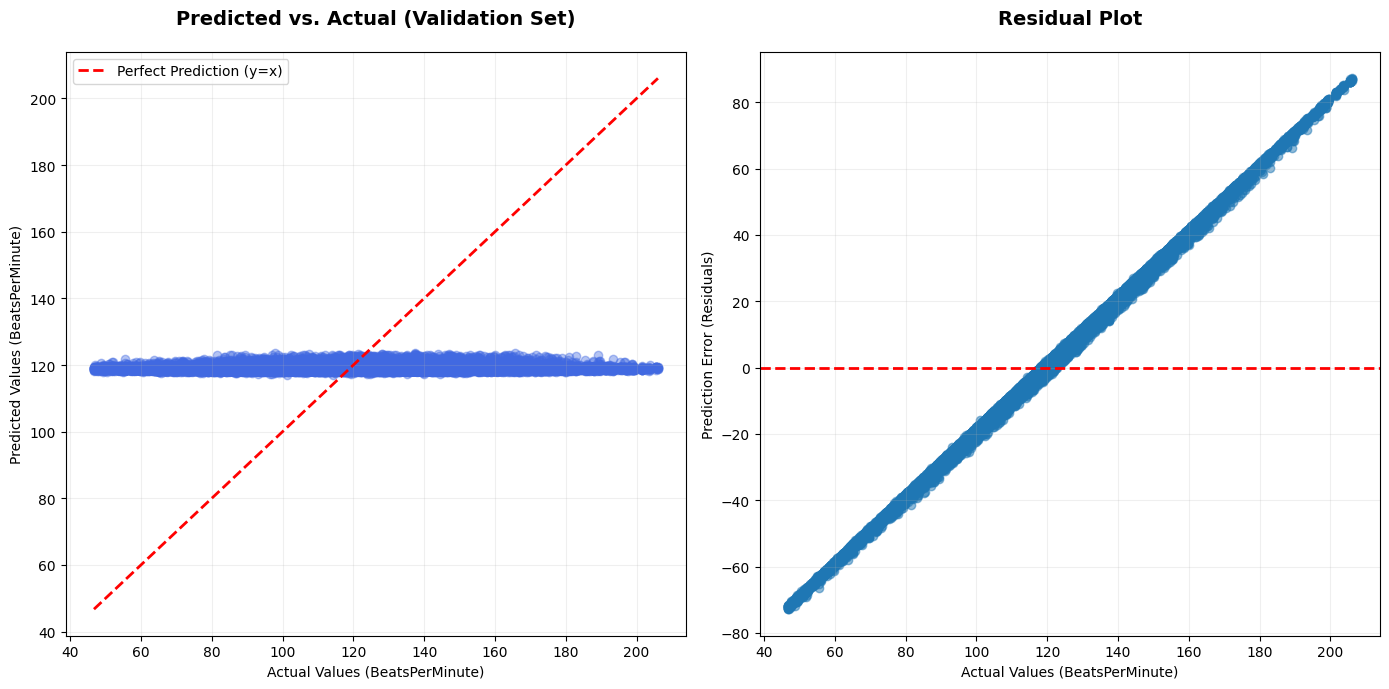

In [ ]:
weight_rmse_vc = evaluate_model(model = voting_reg, X_train = df_train_new_prepared, 
                   X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>


In [ ]:
df_test_prepared = preprocessor.transform(processed_test_df)
y_pred_test = voting_reg.predict(df_test_prepared)

submission_df = pd.DataFrame({
    "id": df_test.index,
    "BeatsPerMinute": y_pred_test
})

submission_df.to_csv("submission.csv", index=False)
print("\nSubmission file saved!")
submission_df.head()


Submission file saved!


,id,BeatsPerMinute
0,524164,118.991249
1,524165,118.802427
2,524166,119.703904
3,524167,119.204383
4,524168,119.191617


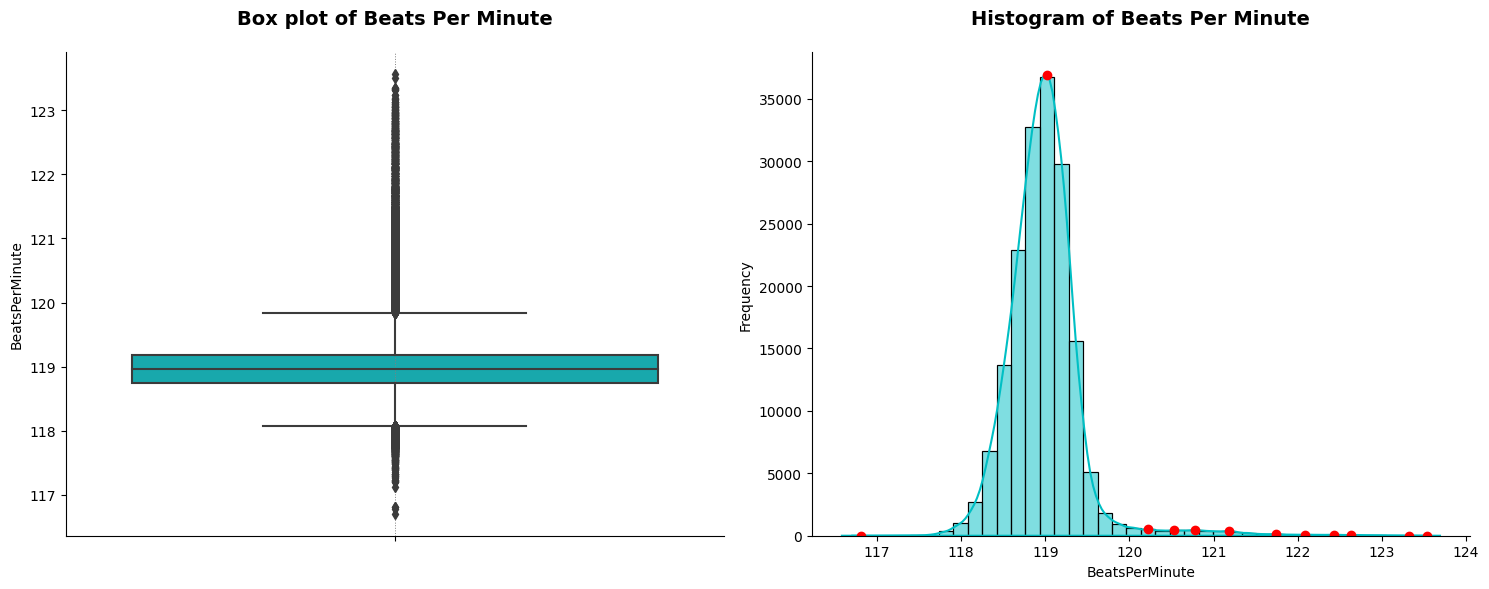

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.boxplot(data=submission_df, y = "BeatsPerMinute", ax=ax[0], color="#00BFC4")
ax[0].set_title(f"Box plot of Beats Per Minute", fontsize=14, pad=20, weight="bold")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("BeatsPerMinute")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

sns.histplot(data=submission_df, x = "BeatsPerMinute", ax=ax[1], color="#00BFC4", kde=True, bins=40)
ax[1].set_title(f"Histogram of Beats Per Minute", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("BeatsPerMinute")
ax[1].set_ylabel("Frequency")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = sns.kdeplot(submission_df["BeatsPerMinute"], ax=ax[1], color="#00BFC4").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

plt.tight_layout()
plt.show()

**Insight**

**Box Plot**

* BPM values are **highly concentrated** in the narrow range of 118–120.
* Median is around 119, with **Q1 ≈ 118.7 and Q3 ≈ 119.3**, giving an extremely small IQR.
* Many points are flagged as **outliers** on both sides (\~117 on the lower end, \~121–123 on the higher end), but this mainly happens because the distribution is so tight that even small deviations are detected as outliers.

**Histogram + KDE**

* The BPM distribution is **close to normal**, with a clear peak around 119.
* The KDE curve shows good symmetry with little skewness.
* Small peaks at the edges (red dots) correspond to low-density areas, matching the outliers seen in the box plot.

**Conclusion**

* The `BeatsPerMinute` variable is **stable and approximately normally distributed**, clustering mainly around 119.
* The “outliers” are simply slight deviations from the mean rather than true anomalies.

PermutationExplainer explainer: 1001it [01:23, 10.96it/s]


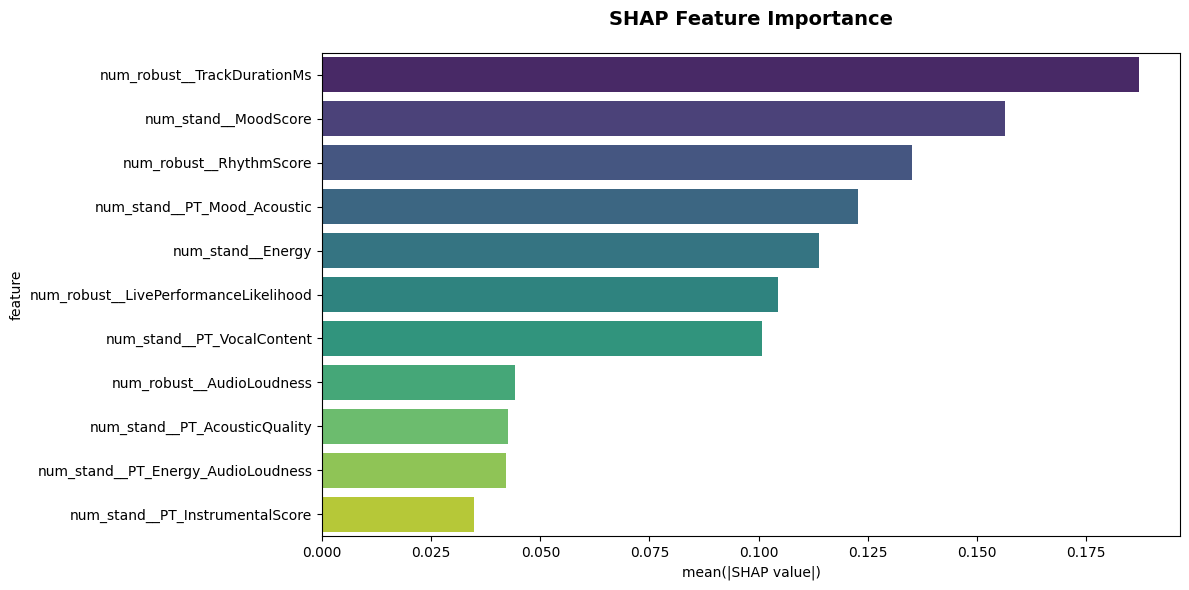

In [ ]:
shap_plot(model=voting_reg.named_estimators_["cb"], X_test=df_test_prepared[:1000], 
          list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 1001it [01:21, 10.81it/s]                          


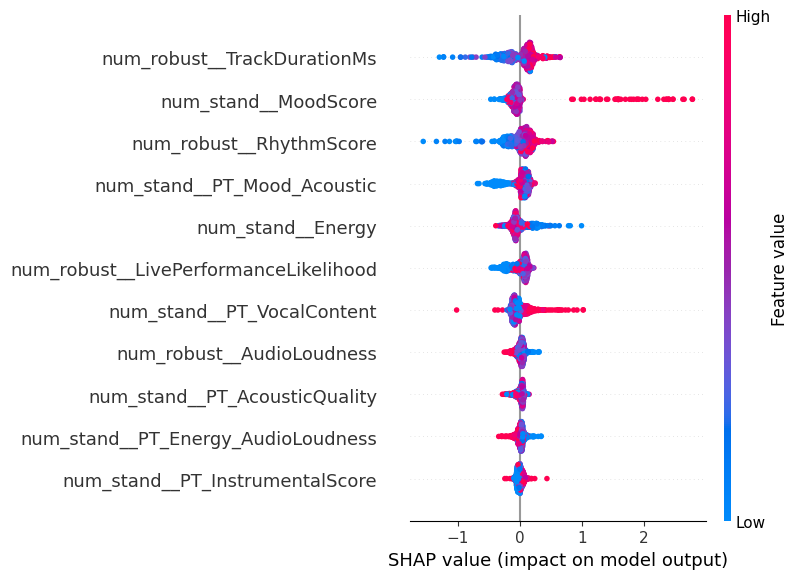

In [ ]:
shap_plot(model=voting_reg.named_estimators_["cb"], X_test=df_test_prepared[:1000], 
          list_feature=list_feature_prepared)

**Insight**

**SHAP Feature Importance (Bar Plot)**

* **TrackDurationMs** stands out as the most influential factor → track length is the top driver of BPM predictions.
* **MoodScore** and **RhythmScore** also play key roles → emotional tone and rhythm strongly impact BPM.
* **Mood\_Acoustic** (interaction feature) and **Energy** contribute significantly as well.
* Other features such as **VocalContent**, **AudioLoudness**, **AcousticQuality**, and **InstrumentalScore** have smaller but still supportive effects.

**SHAP Summary Plot (Beeswarm)**

* **TrackDurationMs**: higher values (red points) generally **increase BPM predictions**, while lower values decrease them.
* **MoodScore**: higher mood scores tend to push BPM upward, lower values pull it downward.
* **RhythmScore**: shows a similar pattern → stronger rhythm aligns with higher BPM.
* **Energy**: fairly balanced, though higher values (red) can still push predictions positively.
* Less important features (e.g., AudioLoudness, AcousticQuality) cluster narrowly around 0, showing only minor impact.

**Conclusion**

* The model considers **track length, mood, and rhythm** as the most crucial factors for BPM prediction.
* Interaction features (like `Mood_Acoustic`, `Energy_AudioLoudness`) provide extra predictive power.
* The SHAP patterns are consistent with musical intuition: longer tracks, strong mood, and clear rhythm → higher BPM.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
